## Handwritten Digit Recognition

#####  Submitted by,
##### Rose Mary Jose


#### Objective
Handwritten digit recognition system not only detects scanned images of handwritten digits.Handwritten digit recognition using MNIST dataset is a major project made with the help of Neural Network. It basically detects the scanned images of handwritten digits.

#### Introduction

Handwritten digit recognition is the task of automatically identifying and classifying handwritten digits (0-9) from scanned or digital images. It is a specific subfield of character recognition and falls under the broader category of image classification in the field of computer vision. Handwritten digit recognition is a popular application of machine learning and artificial intelligence, often implemented using neural networks. The MNIST dataset is indeed a well-known dataset for training and testing handwritten digit recognition systems.

MNIST dataset is a widely used benchmark for digit recognition, there are more challenging datasets and tasks related to handwriting recognition, such as recognizing handwritten text or cursive handwriting. In those cases, more advanced neural network architectures and techniques may be required.

Overall, handwritten digit recognition using the MNIST dataset is a fundamental project in the field of computer vision and machine learning, serving as a stepping stone to more complex image recognition tasks.

#### Dataset
* The MNIST dataset consists of 28x28 pixel grayscale images of handwritten digits (0-9). 
* It is divided into a training set and a test set. The training set is used to train the neural network, and the test set is used to evaluate its performance.

In [35]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [36]:
## Get the data and preprocess
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [37]:
X_train.shape,y_train.shape, X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

* MNIST dataset is downloaded and the dataset is loaded as train and test data.

In [38]:
def plot_input_img(i):
    plt.imshow(X_train[0],cmap = "binary")
    plt.title(y_train[i])
    plt.show()


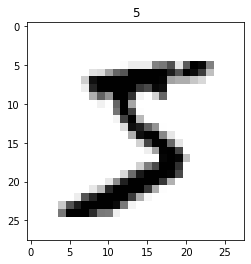

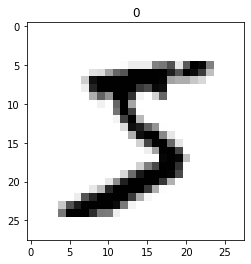

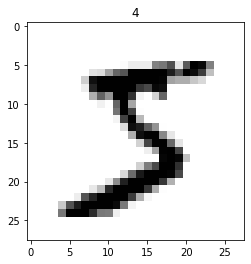

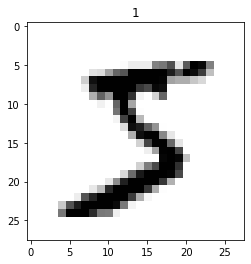

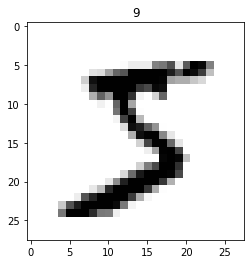

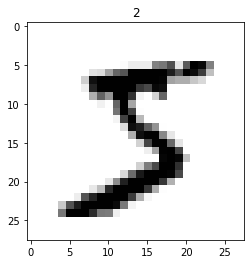

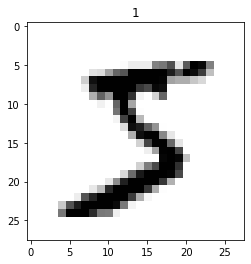

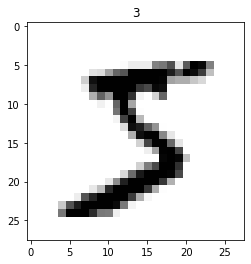

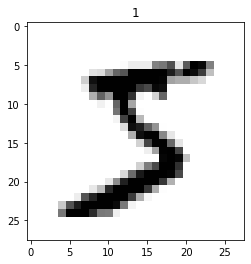

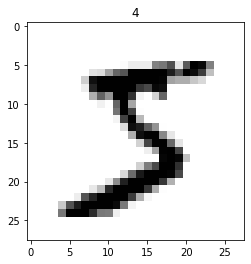

In [39]:
for i in range(10):
    plot_input_img(i)

* First 10 images of the handwritten digits is plotted by def a function plot_input_img which plots the image in train data using the function imshow in matplotlib library.


#### Data Pre-Processing
* Before training the neural network, preprocessing steps may be applied to the images. 
* Common preprocessing steps include resizing, normalization (scaling pixel values to a range between 0 and 1), and data augmentation (creating variations of the training images to improve generalization).

In [40]:
# pre process the images
# Normalizing the image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

# reshape the dim of images to (28,28,1)
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)


In [41]:
X_train.shape

(60000, 28, 28, 1)

* Train and test images are normalized to the range (0,1).
* After normalizing the dimension of the train and test images are reshaped into (28,28,1).

### Model Building

* A neural network model for handwritten digit recognition using the MNIST dataset. Keras library from python is used for model building.   
* A Convolutional Neural Network (CNN) is a type of Deep Learning neural network architecture commonly used in Computer Vision. Computer vision is a field of Artificial Intelligence that enables a computer to understand and interpret the image or visual data. 
* Convolutional Neural Network (CNN) is the extended version of artificial neural networks (ANN) which is predominantly used to extract the feature from the grid-like matrix dataset. 
* Convolutional Neural Network consists of multiple layers like the input layer, Convolutional layer, Pooling layer, and fully connected layers. 
* The Convolutional layer applies filters to the input image to extract features, the Pooling layer downsamples the image to reduce computation, and the fully connected layer makes the final prediction. The network learns the optimal filters through backpropagation and gradient descent.

 
 
* Advantages of Convolutional Neural Networks (CNNs):
1) Good at detecting patterns and features in images, videos, and audio signals.
2) Robust to translation, rotation, and scaling invariance.
3) End-to-end training, no need for manual feature extraction.
4) Can handle large amounts of data and achieve high accuracy.
* Disadvantages of Convolutional Neural Networks (CNNs):
1) Computationally expensive to train and require a lot of memory.
2) Can be prone to overfitting if not enough data or proper regularization is used.
3) Requires large amounts of labeled data.
4) Interpretability is limited, it’s hard to understand what the network has learned.



In [42]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [43]:
# model building
model = Sequential()

model.add(Conv2D(32,(3,3),input_shape = (28,28,1),activation = "relu"))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3),input_shape = (28,28,1),activation = "relu"))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10,activation = "softmax"))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [45]:
model.compile(optimizer = "adam",loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])

In [46]:
# callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# earlystopping
es = EarlyStopping(monitor = "val_acc",min_delta = 0.01,patience = 4,verbose = 1)

# model checkpoint

mc = ModelCheckpoint("./bestmodel.h5", monitor ="val_acc",verbose = 1, save_best_only = True)


cb = [es,mc]

In [47]:
his = model.fit(X_train,y_train,epochs =50 ,validation_split = 0.3,callbacks = cb)

Epoch 1/50
1313/1313 [==============================] - 26s 19ms/step - loss: 0.2058 - accuracy: 0.9372 - val_loss: 0.0830 - val_accuracy: 0.9748
Epoch 2/50
1313/1313 [==============================] - 24s 19ms/step - loss: 0.0703 - accuracy: 0.9780 - val_loss: 0.0634 - val_accuracy: 0.9804
Epoch 3/50
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0483 - val_accuracy: 0.9849
Epoch 4/50
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0435 - accuracy: 0.9861 - val_loss: 0.0450 - val_accuracy: 0.9863
Epoch 5/50
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0362 - accuracy: 0.9886 - val_loss: 0.0453 - val_accuracy: 0.9855
Epoch 6/50
1313/1313 [==============================] - 25s 19ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0438 - val_accuracy: 0.9864
Epoch 7/50
1313/1313 [==============================] - 24s 18ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0368 -

#### Model Evaluation

In [51]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)
print("test accuracy:", test_accuracy)
print("test loss: ", test_loss)

313/313 [==============================] - 1s 5ms/step - loss: 0.0492 - accuracy: 0.9917
test accuracy: 0.9916999936103821
test loss:  0.049216918647289276


#### Model Predictions

In [52]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 4ms/step


In [53]:
# convert one-hot encoded perdictions to readable predictions
readable_predictions = np.argmax(y_test,axis = 1)

# map indices to class lables
class_labels = ["zero","One","Two","Three","Four","Five","Six","Seven","Eight","Nine"]
predicted_classes = [class_labels[pred] for pred in readable_predictions]

#### Visualizing the predictions

In [54]:
def plot_output_img(i):
    plt.imshow(X_test[i],cmap ="binary")
    plt.title(predicted_classes[i])
    plt.show()

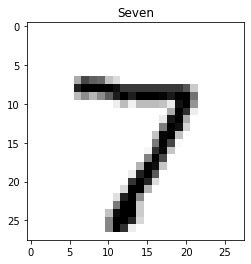

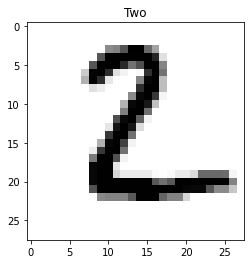

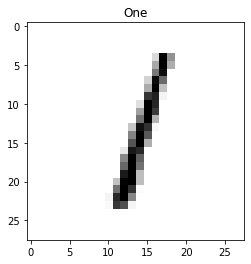

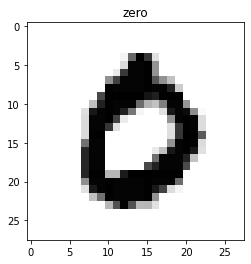

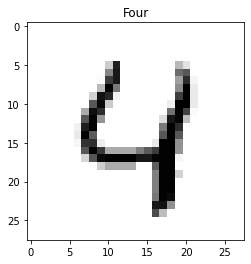

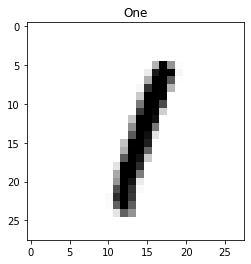

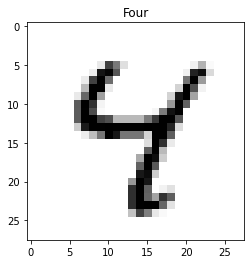

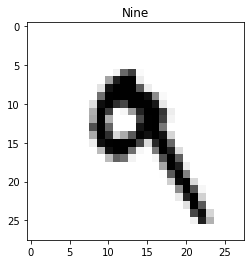

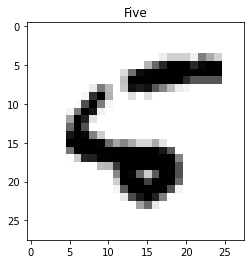

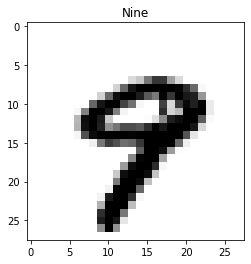

In [55]:
for i in range(10):
    plot_output_img(i)

* Modelling using the CNN algorithm by fitting the train data and predicting the test data the model is built.
* The metrics used for model building is accuracy and the accuracy of the fitted model was found to be 0.99 percentage. 
* The test loss was too low and test accuracy was high thus it can conlcuded that the model built is good for both training and testing dataset thus the model built is a better one.
* The predicted values was visually represented. 